In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Experimentos del TP
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.


# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **EG**: Eliminacion Gaussiana.
- **LU**: Factorización LU.

# Experimentos
Leemos el dataframe con todos los resultados.

In [98]:
df_resultados_tiempos = pd.read_csv("./resultados/resultado.csv");
df_resultados_tiempos = df_resultados_tiempos.assign(metodo=df_resultados_tiempos.metodo.map({0: "EG", 1: "LU"}))

df_resultados_tiempos_EG = df_resultados_tiempos[df_resultados_tiempos["metodo"] == "EG"]
df_resultados_tiempos_LU = df_resultados_tiempos[df_resultados_tiempos["metodo"] == "LU"]


In [99]:
df_resultados_tiempos_LU

,entrada,salida,metodo,tiempo
210,instancias/instancia_live/LIVE_40.in,resultados/instancia_live/LIVE_40.out,LU,412.578
211,instancias/instancia_live/LIVE_35.in,resultados/instancia_live/LIVE_35.out,LU,404.298
212,instancias/instancia_live/LIVE_20.in,resultados/instancia_live/LIVE_20.out,LU,387.653
213,instancias/instancia_live/LIVE_25.in,resultados/instancia_live/LIVE_25.out,LU,385.121
214,instancias/instancia_live/LIVE_5.in,resultados/instancia_live/LIVE_5.out,LU,365.131
215,instancias/instancia_live/LIVE_10.in,resultados/instancia_live/LIVE_10.out,LU,366.459
216,instancias/instancia_live/LIVE_45.in,resultados/instancia_live/LIVE_45.out,LU,421.658
217,instancias/instancia_live/LIVE_50.in,resultados/instancia_live/LIVE_50.out,LU,419.806
218,instancias/instancia_live/LIVE_15.in,resultados/instancia_live/LIVE_15.out,LU,385.146
219,instancias/instancia_live/LIVE_30.in,resultados/instancia_live/LIVE_30.out,LU,407.541


In [ ]:
criterion = df2['a'].map(lambda x: x.startswith('t'))

In [100]:
df_resultados_inst_live_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_live') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_live_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_live') for inst in df_resultados_tiempos_LU["entrada"]
]]



In [101]:
df_resultados_ideal_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_ideal') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_ideal_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_ideal') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [102]:
df_resultados_prendido_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_prendido') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_prendido_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_prendido') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [103]:
df_resultados_intercalada_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_intercalada') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_intercalada_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_intercalada') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [105]:
#grafico sobre la performance por cantidad de instancias
def getInstancesValue(row):
    return int(row.entrada.split("_")[2].split(".")[0])
    
df_resultados_prendido_con_inst_LU = df_resultados_inst_prendido_LU.copy();
df_resultados_prendido_con_inst_LU["ninst"] = df_resultados_prendido_con_inst_LU.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_prendido_con_inst_LU =  df_resultados_prendido_con_inst_LU.sort_values(by="ninst")

    
df_resultados_prendido_con_inst_EG = df_resultados_prendido_EG.copy();
df_resultados_prendido_con_inst_EG["ninst"] = df_resultados_prendido_con_inst_EG.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_prendido_con_inst_EG =  df_resultados_prendido_con_inst_EG.sort_values(by="ninst")



In [106]:
#grafico sobre la performance por cantidad de instancias
    
df_resultados_live_con_inst_LU = df_resultados_inst_live_LU.copy();
df_resultados_live_con_inst_LU["ninst"] = df_resultados_live_con_inst_LU.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_live_con_inst_LU =  df_resultados_live_con_inst_LU.sort_values(by="ninst")

    
df_resultados_live_con_inst_EG = df_resultados_inst_live_EG.copy();
df_resultados_live_con_inst_EG["ninst"] = df_resultados_live_con_inst_EG.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_live_con_inst_EG =  df_resultados_live_con_inst_EG.sort_values(by="ninst")



In [107]:
df_resultados_live_con_inst_LU

,entrada,salida,metodo,tiempo,ninst
214,instancias/instancia_live/LIVE_5.in,resultados/instancia_live/LIVE_5.out,LU,365.131,5
215,instancias/instancia_live/LIVE_10.in,resultados/instancia_live/LIVE_10.out,LU,366.459,10
218,instancias/instancia_live/LIVE_15.in,resultados/instancia_live/LIVE_15.out,LU,385.146,15
212,instancias/instancia_live/LIVE_20.in,resultados/instancia_live/LIVE_20.out,LU,387.653,20
213,instancias/instancia_live/LIVE_25.in,resultados/instancia_live/LIVE_25.out,LU,385.121,25
219,instancias/instancia_live/LIVE_30.in,resultados/instancia_live/LIVE_30.out,LU,407.541,30
211,instancias/instancia_live/LIVE_35.in,resultados/instancia_live/LIVE_35.out,LU,404.298,35
210,instancias/instancia_live/LIVE_40.in,resultados/instancia_live/LIVE_40.out,LU,412.578,40
216,instancias/instancia_live/LIVE_45.in,resultados/instancia_live/LIVE_45.out,LU,421.658,45
217,instancias/instancia_live/LIVE_50.in,resultados/instancia_live/LIVE_50.out,LU,419.806,50


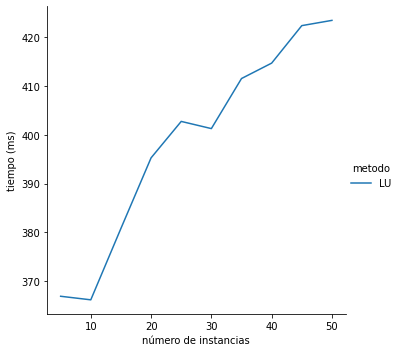

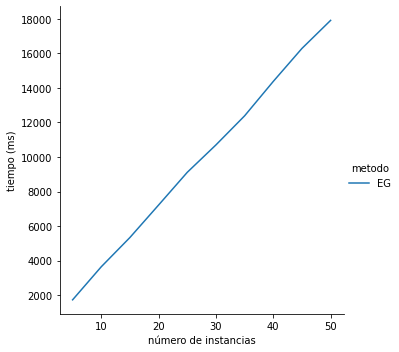

In [119]:
performanceLU=sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_prendido_con_inst_LU, hue="metodo");
performanceEG=sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_prendido_con_inst_EG, hue="metodo");
performanceLU.set(ylabel="tiempo (ms)", xlabel="número de instancias")
performanceEG.set(ylabel="tiempo (ms)", xlabel="número de instancias")

performanceLU.figure.savefig("performace-LU-prendido.png")
performanceEG.figure.savefig("performance-EG-prendido.png")
#sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_live_con_inst_LU);
#sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_live_con_inst_EG);

## Experimento 1


In [3]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
fig = sns.lineplot(data=df_resultados_tiempos, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("../graficos/tiempo-heuristicas.svg");

ValueError: Could not interpret value `n` for parameter `x`

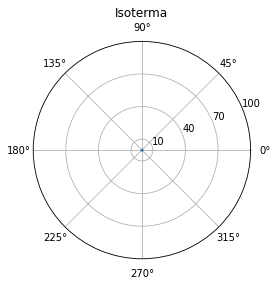

In [23]:
#Este codigo es de ejemplo, usa datos aleatorios

cantidad_puntos = 50
r = np.random.normal(0.5, 0.05, cantidad_puntos)
r[-1] = r[0] # Solo para que la isoterma se "pegue" bien al dar la vuelta
theta = np.linspace(0, 2*np.pi, cantidad_puntos)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rticks([10+90/3*x for x in range(4)])
ax.grid(True)

ax.set_title("Isoterma")
plt.show()

<ipython-input-18-b6a37d165c1b>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  grafico = ax.pcolor(theta, r, z, cmap='jet')


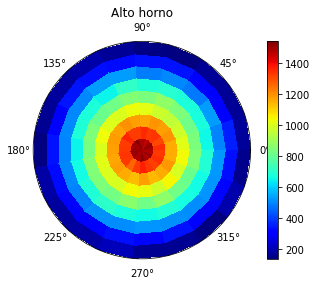

In [18]:
cantidad_angulos = 20
cantidad_radios = 10
theta = np.tile(np.linspace(0, 2*np.pi, cantidad_angulos), (cantidad_radios, 1)).transpose()
r = np.tile(np.linspace(0, 1, cantidad_radios), (cantidad_angulos, 1))
z = np.tile(np.linspace(1500,0,cantidad_radios), (cantidad_angulos,1))
z += np.random.standard_normal((cantidad_angulos,cantidad_radios))*20


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

grafico = ax.pcolor(theta, r, z, cmap='jet')
ax.set_title('Alto horno')

ax.set_yticklabels([])

fig.colorbar(grafico)
plt.show()

/tmp/ipykernel_54547/2023886515.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  grafico = ax.pcolor(theta, r, z, cmap='jet')


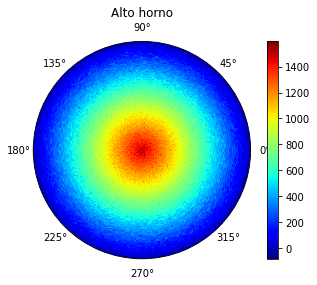

In [ ]:
cantidad_angulos = 200
cantidad_radios = 100
theta = np.tile(np.linspace(0, 2*np.pi, cantidad_angulos), (cantidad_radios, 1)).transpose()
r = np.tile(np.linspace(0, 1, cantidad_radios), (cantidad_angulos, 1))
z = np.tile(np.linspace(1500,0,cantidad_radios), (cantidad_angulos,1))
z += np.random.standard_normal((cantidad_angulos,cantidad_radios))*30


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

grafico = ax.pcolor(theta, r, z, cmap='jet')
ax.set_title('Alto horno')

ax.set_yticklabels([])

fig.colorbar(grafico)
plt.show()

In [15]:

def mapaCalorDelHorno (radio_interno, radio_externo, cantidad_radios, cantidad_angulos, temperaturas, titulo) :
    #theta es la forma de la matriz que luego es curvada
    theta = np.tile(np.linspace(0, 2*np.pi, cantidad_angulos), (cantidad_radios, 1)).transpose()
    #r es la forma fisica del horno
    r = np.tile(np.linspace(radio_interno, radio_externo, cantidad_radios), (cantidad_angulos, 1))
    #z son los valores del horno, cada fila es un rayo desde el centro hacia afuera del horno
    z = np.array(temperaturas).reshape((cantidad_radios, cantidad_angulos)).T


    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    grafico = ax.pcolor(theta, r, z, cmap='jet')
    ax.set_title(titulo)

    ax.set_yticklabels([])

    fig.colorbar(grafico)
    plt.show()

In [ ]:
def mostrarIsoterma (radio_interno, radio_externo, cantidad_angulos, puntos_isoterma, titulo) :

    r = puntos_isoterma
    r[-1] = r[0] # Solo para que la isoterma se "pegue" bien al dar la vuelta
    theta = np.linspace(0, 2*np.pi, cantidad_angulos)

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, r)
    ax.set_rticks([radio_interno+(radio_externo - radio_interno)/3*x for x in range(4)])
    ax.grid(True)

    ax.set_title(titulo)
    plt.show()